In [1]:
from Neural import NeuralNetwork
from Logistic import LogisticRegressionScratch
from Softmax import SoftmaxRegression
import torch.nn as nn
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from torch.utils.data import TensorDataset, DataLoader
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

# Logestic data Loader

In [2]:
def load_data_logistic(file_path, batch_size=64):
    data = pd.read_csv(file_path)
    Y = data['label'].values
    X = data.drop(columns=['label'], axis=1).values
    X = X / 255.0  # Normalize features

    mask = (Y == 0) | (Y == 1)  # Binary classification mask
    X_binary = X[mask]
    Y_binary = Y[mask]

    # Split the data 60-20-20
    X_train_binary, X_temp_binary, Y_train_binary, Y_temp_binary = train_test_split(
        X_binary, Y_binary, test_size=0.4, stratify=Y_binary, random_state=30
    )
    X_val_binary, X_test_binary, Y_val_binary, Y_test_binary = train_test_split(
        X_temp_binary, Y_temp_binary, test_size=0.5, stratify=Y_temp_binary, random_state=30
    )

    train_dataset = TensorDataset(torch.tensor(X_train_binary, dtype=torch.float32),
                                  torch.tensor(Y_train_binary, dtype=torch.long))
    val_dataset = TensorDataset(torch.tensor(X_val_binary, dtype=torch.float32),
                                torch.tensor(Y_val_binary, dtype=torch.long))
    test_dataset = TensorDataset(torch.tensor(X_test_binary, dtype=torch.float32),
                                 torch.tensor(Y_test_binary, dtype=torch.long))

    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=False)
    val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
    test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

    return train_loader, val_loader, test_loader

# Softmax and neural networks data loader

In [3]:
def load_data(file_path, batch_size=64):
    data = pd.read_csv(file_path)
    Y = data['label'].values
    X = data.drop(columns=['label'], axis=1).values
    X = X/255.0  # Normalize features
    # Split the data 60-20-20 for train, validation, and test
    X_train, X_temp, Y_train, Y_temp = train_test_split(X, Y, test_size=0.4, stratify=Y, random_state=30)
    X_val, X_test, Y_val, Y_test = train_test_split(X_temp, Y_temp, test_size=0.5, stratify=Y_temp, random_state=30)

    # Create TensorDatasets for each split
    # Convert data (numpy arrays) to PyTorch tensors
    train_dataset = TensorDataset(torch.tensor(X_train, dtype=torch.float32),
                                  torch.tensor(Y_train, dtype=torch.long))
    val_dataset = TensorDataset(torch.tensor(X_val, dtype=torch.float32),
                                torch.tensor(Y_val, dtype=torch.long))
    test_dataset = TensorDataset(torch.tensor(X_test, dtype=torch.float32),
                                 torch.tensor(Y_test, dtype=torch.long))

    # Data loaders for batching and shuffling the data
    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
    val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
    test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

    return train_loader, val_loader, test_loader


# Compare All Models


| Model Type                | Description                                                            | Output Type      |
| ------------------------- | ---------------------------------------------------------------------- | ---------------- |
| **Logistic Regression**   | Binary classifier (using sigmoid)                                      | 0 or 1           |
| **Softmax Regression**    | Multiclass generalization of logistic regression (K outputs + softmax) | one-hot          |
| **Neural Network (best)** | Multilayer model (2 hidden layers) using ReLU                          | 0–9 (multiclass) |


# Use Test Dataset

**1) Neural Networks**

In [4]:
# #best model
from pyexpat import model


device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
train_loader, val_loader, test_loader = load_data('mnist_All.csv', batch_size=64)
model_nn = NeuralNetwork(input_size=784, hidden_size=[128, 128], layers=2, output_size=10).to(device)
loss_function = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model_nn.parameters(), lr=0.01)


# ---- Train final best model ----
best_model_state, train_losses_nn, val_losses_nn, train_std_nn, val_std_nn, train_acc_nn, val_acc_nn = model_nn.train_model(
    train_loader, val_loader, loss_function, optimizer, epochs=100, patience=5)
# ---- Evaluate on test set ----
torch.save(best_model_state, 'best_neural_model.pth')
model_nn.load_state_dict(best_model_state)

Epoch [1/100] | Train Loss: 0.9524 ± 0.5486 | Val Loss: 0.4526 ± 0.0954 | Train Acc: 0.7513, Val Acc: 0.8779
Epoch [2/100] | Train Loss: 0.3894 ± 0.0992 | Val Loss: 0.3465 ± 0.0969 | Train Acc: 0.8921, Val Acc: 0.9039
Epoch [3/100] | Train Loss: 0.3207 ± 0.0949 | Val Loss: 0.3132 ± 0.0971 | Train Acc: 0.9088, Val Acc: 0.9087
Epoch [4/100] | Train Loss: 0.2861 ± 0.0950 | Val Loss: 0.2775 ± 0.0933 | Train Acc: 0.9174, Val Acc: 0.9201
Epoch [5/100] | Train Loss: 0.2601 ± 0.0915 | Val Loss: 0.2578 ± 0.0916 | Train Acc: 0.9256, Val Acc: 0.9255
Epoch [6/100] | Train Loss: 0.2407 ± 0.0897 | Val Loss: 0.2398 ± 0.0878 | Train Acc: 0.9310, Val Acc: 0.9321
Epoch [7/100] | Train Loss: 0.2245 ± 0.0874 | Val Loss: 0.2303 ± 0.0883 | Train Acc: 0.9369, Val Acc: 0.9349
Epoch [8/100] | Train Loss: 0.2099 ± 0.0859 | Val Loss: 0.2154 ± 0.0834 | Train Acc: 0.9398, Val Acc: 0.9377
Epoch [9/100] | Train Loss: 0.1981 ± 0.0815 | Val Loss: 0.2089 ± 0.0846 | Train Acc: 0.9438, Val Acc: 0.9407
Epoch [10/100] | Tr

<All keys matched successfully>

**2) Soft-Max**

In [5]:
def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6,5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.title(title)
    plt.show()

In [6]:
train_loader, val_loader, test_loader = load_data('mnist_All.csv', batch_size=16)
softmax_model = SoftmaxRegression(input_dim=784, num_classes=10, lr=0.1)
train_losses_softmax, val_losses_softmax, train_accs_softmax, val_accs_softmax = softmax_model.train_model(train_loader, val_loader)


**3) Logistic regression**

Epoch 1/15 | Train Loss: 0.009742 | Val Loss: 0.005078 | Train Acc: 0.9970 | Val Acc: 0.9980
Epoch 2/15 | Train Loss: 0.004097 | Val Loss: 0.005312 | Train Acc: 0.9988 | Val Acc: 0.9980
Epoch 3/15 | Train Loss: 0.002414 | Val Loss: 0.005224 | Train Acc: 0.9993 | Val Acc: 0.9980
Epoch 4/15 | Train Loss: 0.001480 | Val Loss: 0.005316 | Train Acc: 0.9995 | Val Acc: 0.9980
Epoch 5/15 | Train Loss: 0.000949 | Val Loss: 0.005340 | Train Acc: 0.9998 | Val Acc: 0.9980
Epoch 6/15 | Train Loss: 0.000715 | Val Loss: 0.005200 | Train Acc: 1.0000 | Val Acc: 0.9980

Early stopping at epoch 6.

Evaluate Logistic Regression:


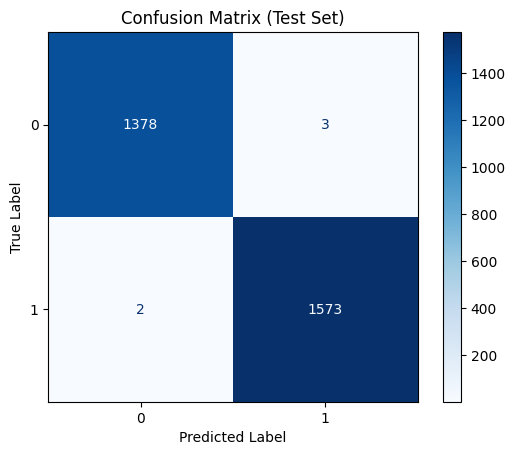


Final Test Loss: 0.0027
Final Test Accuracy: 99.83%


In [7]:
train_loader_logistic, val_loader_logistic, test_loader_logistic = load_data_logistic('mnist_All.csv', batch_size=16)
logestic_model = LogisticRegressionScratch(input_dim=784, lr=0.1)
train_losses_logistic, val_losses_logistic, train_accs_logistic, val_accs_logistic = logestic_model.train(train_loader_logistic, val_loader_logistic)
_, logestic_acc, _=logestic_model.test(test_loader_logistic)

Soft-Max Model Evaluation:


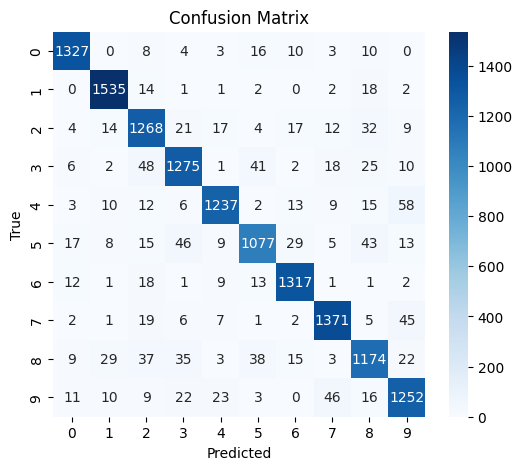

In [8]:
print("Soft-Max Model Evaluation:")
_, softmax_acc=softmax_model.evaluate(test_loader)

Neural Network Model Evaluation:


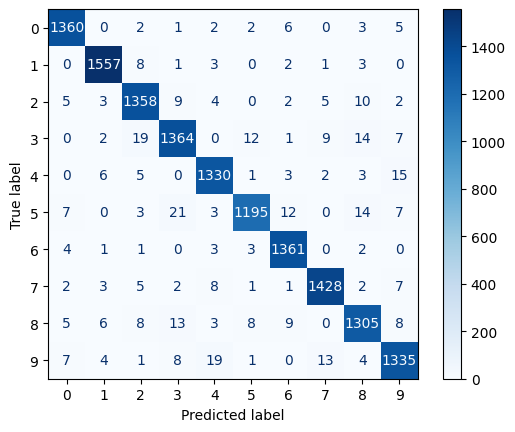


 Test Loss: 0.0985
Test Accuracy: 0.9709


In [9]:
## Evaluate the best model
print("Neural Network Model Evaluation:")
_, nn_acc=model_nn.evaluate_model(test_loader, loss_function)

# Models Analysis

**Discuss when to use each approach**

**Analyze computational complexity and training time**

| **Feature / Situation**   | **Logistic Regression**                  | **Softmax Regression**                           | **Neural Network (Best choice when...)**           |
| ------------------------- | ---------------------------------------- | ------------------------------------------------ | -------------------------------------------------- |
| **Type of Problem**       | Binary classification (2 classes)        | Multi-class classification (3 or more classes)   | Complex tasks — binary, multi-class, or regression |
| **Output**                | Probability of one class (e.g., 0 or 1)  | Probabilities for all classes (sum = 1)          | Flexible — can output any pattern or probability   |
| **Example Use**           | Spam vs. not spam                        | Handwritten digit recognition (0–9)              | Image recognition, speech, natural language        |
| **Model Complexity**      | Simple (1 layer)                         | Simple (1 layer, multi-output)                   | Complex (many layers, nonlinear)                   |
| **Data Size Needed**      | Small to medium                          | Small to medium                                  | Large dataset needed for good results              |
| **Feature Relationships** | Works with linear relationships          | Works with linear relationships (for each class) | Handles both linear and nonlinear relationships    |
| **When to Use**           | When data is small and problem is binary | When classes > 2 but still simple                | When problem is complex and large data available   |
| **Computation Cost**      | Low                                      | Low–medium                                       | High (requires GPUs for big models)                |
| **Training Time**         | 5.4 seconds                              | 2 min,8.5 seconds                                | 4 minutes, 20.3 seconds                            |


# Best Model Evaluation

In [10]:
print("Final Accuracy Report:\n")
print(f"{'Model':<25}{'Test Accuracy (%)':>20}")
print("-" * 45)
print(f"{'Logistic Regression':<25}{logestic_acc * 100:>20.2f}%")
print(f"{'Softmax Regression':<25}{softmax_acc * 100:>20.2f}%")
print(f"{'Neural Network':<25}{nn_acc * 100:>20.2f}%")

Final Accuracy Report:

Model                       Test Accuracy (%)
---------------------------------------------
Logistic Regression                     99.83%
Softmax Regression                      91.66%
Neural Network                          97.09%


**Provide insights on model limitations**

| **Model**                      | **Key Limitations**                                                                                                 |
| :----------------------------- | :------------------------------------------------------------------------------------------------------------------ |
| **Logistic Regression**        | Only handles binary classification; assumes linear separability; cannot model complex or non-linear relationships.  |
| **Softmax Regression**         | Limited to linear decision boundaries; computationally heavy for many classes; requires manual feature engineering. |
| **Feedforward Neural Network** | Prone to overfitting; requires large datasets and careful tuning; less interpretable and computationally expensive. |